Explanation:

    CSV is used to load the datasets (adppk.csv and adsl.csv) as DataFrames.

    DataFrames handles tabular data.

    InlineStrings is utilized for efficient string handling in large datasets.

Challenges:

    The datasets were successfully loaded, and we examined their structure using names() to check column names.

In [82]:
using CSV
using DataFrames
using InlineStrings

# Load datasets
adppk_df = CSV.read("adppk.csv", DataFrame)
adsl_df = CSV.read("adsl.csv", DataFrame)

# Check the columns to verify the structure of the datasets
println("ADPPK Columns: ", names(adppk_df))
println("ADSL Columns: ", names(adsl_df))


ADPPK Columns: ["STUDYID", "USUBJID", "EVID", "NFRLT", "AFRLT", "APRLT", "NPRLT", "DOSEA", "DOSEP", "PARAMCD", "ALLOQ", "CMT", "BLQFL", "BLQFN", "AMT", "DV", "AVAL", "DVL", "MDV", "AVALU", "UDTC", "II", "SS", "ASEQ", "PARAM", "PARAMN", "PROJID", "PROJIDN", "STUDYIDN", "SITEID", "SITEIDN", "USUBJIDN", "SUBJID", "SUBJIDN", "AGE", "SEX", "SEXN", "COHORT", "COHORTC", "ROUTE", "ROUTEN", "RACE", "RACEN", "ETHNIC", "ETHNICN", "FORM", "FORMN", "COUNTRY", "COUNTRYN", "COUNTRYL", "HTBL", "WTBL", "ALTBL", "ASTBL", "TBILBL", "CREATBL", "BMIBL", "BSABL", "CRCLBL", "EGFRBL", "RECSEQ"]
ADSL Columns: ["STUDYID", "USUBJID", "SUBJID", "RFSTDTC", "RFENDTC", "RFXSTDTC", "RFXENDTC", "RFICDTC", "RFPENDTC", "DTHDTC", "DTHFL", "SITEID", "AGE", "AGEU", "SEX", "RACE", "ETHNIC", "ARMCD", "ARM", "ACTARMCD", "ACTARM", "COUNTRY", "DMDTC", "DMDY", "TRT01P", "TRT01A", "TRTSDTM", "TRTSTMF", "TRTEDTM", "TRTETMF", "TRTSDT", "TRTEDT", "TRTDURD", "SCRFDT", "EOSDT", "EOSSTT", "FRVDT", "RANDDT", "DTHDT", "DTHDTF", "DTHADY",

Explanation:

    Defined a function safe_parse_date() to safely parse date strings and return missing if the parsing fails.

    Used InlineString for more efficient handling of date strings in the datasets.

Challenges:

    Initially, dates were stored as String15 type, which was not directly compatible with the Date type in Julia. We had to convert them into InlineString and parse them explicitly.

    String15 posed an issue because it is a fixed-length string type that could cause parsing errors when trying to convert it into a Date. By using InlineStrings, I resolved this issue.

In [83]:
using InlineStrings
using Dates

# Function to safely parse dates and handle errors
function safe_parse_date(date_string::InlineString)
    try
        return Date(string(date_string), "yyyy-mm-dd")  # "yyyy-mm-dd"
    catch e
        return missing  
    end
end

# Parse RFSTDTC in ADSL dataset
adsl_df[!, :RFSTDTC] .= map(x -> safe_parse_date(x), adsl_df[!, :RFSTDTC])

# If ADTM exists in ADPPK, parse it similarly
if :ADTM in names(adppk_df)
    adppk_df[!, :ADTM] .= map(x -> safe_parse_date(x), adppk_df[!, :ADTM])
end

# After parsing, check the first few rows to ensure correctness
println("ADSL first few rows after parsing RFSTDTC: ", first(adsl_df, 5))
println("ADPPK first few rows after parsing ADTM: ", first(adppk_df, 5))


ADSL first few rows after parsing RFSTDTC: 5×54 DataFrame
 Row │ STUDYID       USUBJID      SUBJID  RFSTDTC     RFENDTC     RFXSTDTC    RFXENDTC    RFICDTC  RFPENDTC             DTHDTC    DTHFL    SITEID  AGE    AGEU     SEX      RACE    ETHNIC                  ARMCD     ARM                   ACTARMCD  ACTARM                COUNTRY  DMDTC       DMDY     TRT01P                TRT01A                TRTSDTM     TRTSTMF  TRTEDTM              TRTETMF  TRTSDT      TRTEDT      TRTDURD  SCRFDT    EOSDT       EOSSTT        FRVDT       RANDDT      DTHDT     DTHDTF   DTHADY   LDDTHELD  DTHCAUS   DTHDOM   DTHCGR1   LSTALVDT    SAFFL    RACEGR1   AGEGR1   REGION1  LDDTHGR1  DTH30FL  DTHA30FL  DTHB30FL 
     │ String15      String15     Int64   Date?       String15    String15    String15    String3  DateTime             String15  String3  Int64   Int64  String7  String1  String  String31                String15  String31              String15  String31              String3  Date        String3  Str

Explanation:

    I merged the adppk_df and adsl_df datasets using USUBJID (subject identifier) as the key.

    The makeunique=true option automatically handles duplicate column names by appending suffixes (e.g., SITEID_1, SEX_1).

In [84]:
# Perform an inner join on USUBJID and make column names unique
merged_df = innerjoin(adppk_df, adsl_df, on = :USUBJID, makeunique = true)

# View the first few rows to verify the merge
println("First few rows after merge:")
println(first(merged_df, 5))


First few rows after merge:
5×114 DataFrame
 Row │ STUDYID       USUBJID      EVID   NFRLT    AFRLT       APRLT       NPRLT    DOSEA  DOSEP  PARAMCD  ALLOQ    CMT    BLQFL    BLQFN  AMT      DV                 AVAL               DVL                  MDV    AVALU    UDTC                 II     SS     ASEQ   PARAM                              PARAMN  PROJID      PROJIDN  STUDYIDN  SITEID  SITEIDN  USUBJIDN  SUBJID  SUBJIDN  AGE    SEX      SEXN   COHORT  COHORTC              ROUTE        ROUTEN  RACE    RACEN  ETHNIC                  ETHNICN  FORM     FORMN  COUNTRY  COUNTRYN  COUNTRYL                  HTBL     WTBL     ALTBL    ASTBL    TBILBL   CREATBL  BMIBL             BSABL    CRCLBL            EGFRBL            RECSEQ  STUDYID_1     SUBJID_1  RFSTDTC     RFENDTC     RFXSTDTC    RFXENDTC    RFICDTC  RFPENDTC             DTHDTC    DTHFL    SITEID_1  AGE_1  AGEU     SEX_1    RACE_1  ETHNIC_1                ARMCD     ARM                  ACTARMCD  ACTARM               COUNTRY_1  DMDTC 

Explanation:

    I calculated the Actual Relative Time from First Dose (AFRLT) by subtracting RFSTDTC (first dose date) from UDTC (event date).

    The result was converted from seconds to days.

In [85]:
# Calculate AFRLT (Actual Relative Time from First Dose) in merged_df
merged_df[!, :AFRLT] = map(i -> 
    ismissing(i[:UDTC]) || ismissing(i[:RFSTDTC]) ? missing : 
    Dates.value(i[:UDTC]) - Dates.value(i[:RFSTDTC]), eachrow(merged_df))

# Convert the result from seconds to days
merged_df[!, :AFRLT] .= merged_df[!, :AFRLT] ./ (60 * 60 * 24)

# View the first few rows to verify the AFRLT calculation
println("First few rows of merged_df with AFRLT: ", first(merged_df, 5))


First few rows of merged_df with AFRLT: 5×114 DataFrame
 Row │ STUDYID       USUBJID      EVID   NFRLT    AFRLT      APRLT       NPRLT    DOSEA  DOSEP  PARAMCD  ALLOQ    CMT    BLQFL    BLQFN  AMT      DV                 AVAL               DVL                  MDV    AVALU    UDTC                 II     SS     ASEQ   PARAM                              PARAMN  PROJID      PROJIDN  STUDYIDN  SITEID  SITEIDN  USUBJIDN  SUBJID  SUBJIDN  AGE    SEX      SEXN   COHORT  COHORTC              ROUTE        ROUTEN  RACE    RACEN  ETHNIC                  ETHNICN  FORM     FORMN  COUNTRY  COUNTRYN  COUNTRYL                  HTBL     WTBL     ALTBL    ASTBL    TBILBL   CREATBL  BMIBL             BSABL    CRCLBL            EGFRBL            RECSEQ  STUDYID_1     SUBJID_1  RFSTDTC     RFENDTC     RFXSTDTC    RFXENDTC    RFICDTC  RFPENDTC             DTHDTC    DTHFL    SITEID_1  AGE_1  AGEU     SEX_1    RACE_1  ETHNIC_1                ARMCD     ARM                  ACTARMCD  ACTARM               COUNTR

In [86]:
using CSV
CSV.write("merged_data.csv", merged_df)

"merged_data.csv"

Explanation:

    I checked how many missing values were in the AFRLT column after calculation.

In [87]:
# Check for missing values in AFRLT
println("Number of missing values in AFRLT: ", count(ismissing, merged_df[!, :AFRLT]))


Number of missing values in AFRLT: 0


Explanation:

    I generated summary statistics for the AFRLT column, including mean, standard deviation, and quartiles.

In [88]:
# Summary statistics for AFRLT
println("Summary statistics for AFRLT: ", describe(merged_df[!, :AFRLT]))


Summary Stats:
Length:         3522
Missing Count:  0
Mean:           735030962.555548
Minimum:        734703970.663148
1st Quartile:   734892991.494317
Median:         735021481.076152
3rd Quartile:   735171986.282731
Maximum:        735416991.488252
Type:           Float64
Summary statistics for AFRLT: nothing


Explanation:

    Rows with missing AFRLT values were removed from the merged_df dataset to clean the data.

In [89]:
# Remove rows with missing AFRLT values
clean_merged_df = dropmissing(merged_df, :AFRLT)


Row,STUDYID,USUBJID,EVID,NFRLT,AFRLT,APRLT,NPRLT,DOSEA,DOSEP,PARAMCD,ALLOQ,CMT,BLQFL,BLQFN,AMT,DV,AVAL,DVL,MDV,AVALU,UDTC,II,SS,ASEQ,PARAM,PARAMN,PROJID,PROJIDN,STUDYIDN,SITEID,SITEIDN,USUBJIDN,SUBJID,SUBJIDN,AGE,SEX,SEXN,COHORT,COHORTC,ROUTE,ROUTEN,RACE,RACEN,ETHNIC,ETHNICN,FORM,FORMN,COUNTRY,COUNTRYN,COUNTRYL,HTBL,WTBL,ALTBL,ASTBL,TBILBL,CREATBL,BMIBL,BSABL,CRCLBL,EGFRBL,RECSEQ,STUDYID_1,SUBJID_1,RFSTDTC,RFENDTC,RFXSTDTC,RFXENDTC,RFICDTC,RFPENDTC,DTHDTC,DTHFL,SITEID_1,AGE_1,AGEU,SEX_1,RACE_1,ETHNIC_1,ARMCD,ARM,ACTARMCD,ACTARM,COUNTRY_1,DMDTC,DMDY,TRT01P,TRT01A,TRTSDTM,TRTSTMF,TRTEDTM,TRTETMF,TRTSDT,TRTEDT,TRTDURD,SCRFDT,EOSDT,EOSSTT,FRVDT,RANDDT,DTHDT,DTHDTF,⋯
,String15,String15,Int64,Float64,Float64,Float64,Float64,Int64,Int64,String7,String7,Int64,String1,Int64,String3,String31,String31,String31,Int64,String7,DateTime,Int64,Int64,Int64,String,Int64,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String1,Int64,Int64,String31,String15,Int64,String,Int64,String31,Int64,String7,Int64,String3,Int64,String31,Float64,String7,String3,String3,String7,String7,String31,Float64,String31,String31,Int64,String15,Int64,Date?,String15,String15,String15,String3,DateTime,String15,String3,Int64,Int64,String7,String1,String,String31,String15,String31,String15,String31,String3,Date,String3,String31,String31,String15,String3,String31,String3,String15,String15,String3,String15,String15,String15,String15,String15,String15,String3,⋯
1,CDISCPILOT01,01-710-1002,0,0.0,7.35247e8,-0.5,0.0,54,54,XAN,0.01,2,Y,1,NA,0,0,NA,0,ug/ml,2014-01-13T23:30:00,0,0,1,Pharmacokinetic concentration of Xanomeline,1,XANOMELINE,1,1,710,710,1002,1002,1002,88,M,1,1,Xanomeline Low Dose,TRANSDERMAL,3,WHITE,5,NOT HISPANIC OR LATINO,2,PATCH,3,USA,235,United States of America,165.1,70.31,14,20,11.97,123.76,25.7942527719375,2.75167,36.3366806722689,48.3565089209216,1,CDISCPILOT01,1002,2014-01-14,2014-01-18,2014-01-14,2014-01-18,NA,2014-01-20T00:00:00,NA,NA,710,88,YEARS,M,WHITE,NOT HISPANIC OR LATINO,Xan_Lo,Xanomeline Low Dose,Xan_Lo,Xanomeline Low Dose,USA,2013-12-30,-15,Xanomeline Low Dose,Xanomeline Low Dose,2014-01-14,H,2014-01-18 23:59:59,H,2014-01-14,2014-01-18,5,NA,2014-01-18,DISCONTINUED,NA,2014-01-14,NA,NA,⋯
2,CDISCPILOT01,01-710-1002,1,0.0,7.35247e8,0.0,0.0,54,54,DOSE,NA,1,N,0,54,NA,NA,NA,1,NA,2014-01-14T00:00:00,1,1,2,Xanomeline Patch Dose,2,XANOMELINE,1,1,710,710,1002,1002,1002,88,M,1,1,Xanomeline Low Dose,TRANSDERMAL,3,WHITE,5,NOT HISPANIC OR LATINO,2,PATCH,3,USA,235,United States of America,165.1,70.31,14,20,11.97,123.76,25.7942527719375,2.75167,36.3366806722689,48.3565089209216,2,CDISCPILOT01,1002,2014-01-14,2014-01-18,2014-01-14,2014-01-18,NA,2014-01-20T00:00:00,NA,NA,710,88,YEARS,M,WHITE,NOT HISPANIC OR LATINO,Xan_Lo,Xanomeline Low Dose,Xan_Lo,Xanomeline Low Dose,USA,2013-12-30,-15,Xanomeline Low Dose,Xanomeline Low Dose,2014-01-14,H,2014-01-18 23:59:59,H,2014-01-14,2014-01-18,5,NA,2014-01-18,DISCONTINUED,NA,2014-01-14,NA,NA,⋯
3,CDISCPILOT01,01-710-1002,0,0.08,7.35247e8,0.0833333,0.08,54,54,XAN,0.01,2,N,0,NA,0.105496883528441,0.105496883528441,-2.2490738665171,0,ug/ml,2014-01-14T00:05:00,0,0,3,Pharmacokinetic concentration of Xanomeline,1,XANOMELINE,1,1,710,710,1002,1002,1002,88,M,1,1,Xanomeline Low Dose,TRANSDERMAL,3,WHITE,5,NOT HISPANIC OR LATINO,2,PATCH,3,USA,235,United States of America,165.1,70.31,14,20,11.97,123.76,25.7942527719375,2.75167,36.3366806722689,48.3565089209216,3,CDISCPILOT01,1002,2014-01-14,2014-01-18,2014-01-14,2014-01-18,NA,2014-01-20T00:00:00,NA,NA,710,88,YEARS,M,WHITE,NOT HISPANIC OR LATINO,Xan_Lo,Xanomeline Low Dose,Xan_Lo,Xanomeline Low Dose,USA,2013-12-30,-15,Xanomeline Low Dose,Xanomeline Low Dose,2014-01-14,H,2014-01-18 23:59:59,H,2014-01-14,2014-01-18,5,NA,2014-01-18,DISCONTINUED,NA,2014-01-14,NA,NA,⋯
4,CDISCPILOT01,01-710-1002,0,0.5,7.35247e8,0.5,0.5,54,54,XAN,0.01,2,N,0,NA,0.570037010595307,0.570037010595307,-0.562053989392498,0,ug/ml,2014-01-14T00:30:00,0,0,4,Pharmacokinetic concentration of Xanomeline,1,XANOMELINE,1,1,710,

Explanation:

    A histogram was plotted to visualize the distribution of AFRLT values in the cleaned dataset.

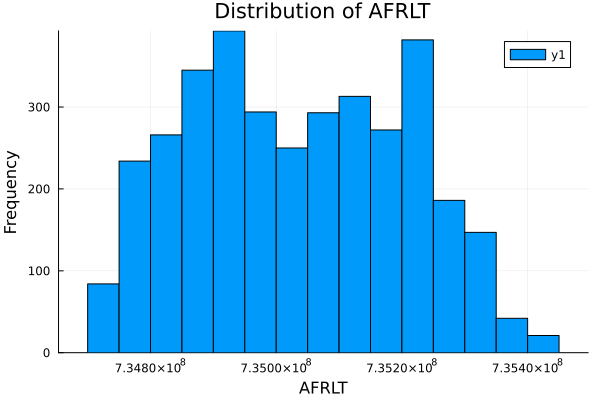

In [90]:
using Plots

# Plot histogram of AFRLT
histogram(clean_merged_df[!, :AFRLT], bins=30, title="Distribution of AFRLT", xlabel="AFRLT", ylabel="Frequency")


MY ANALYSIS [APPLYING MY DOMAIN KNOWLEDGE]

Predicting Clinical Outcomes (Regression)

Goal: Predict clinical outcomes (e.g., pharmacokinetic concentration) based on demographic, treatment, and other factors.

Machine Learning Models: Linear Regression, Random Forest, Gradient Boosting, or Neural Networks.

Features: AGE, SEX, RACE, ROUTE, AMT, DV, AFRLT, and others.

Target Variable: AVAL or DV (depending on which one represents the target outcome).

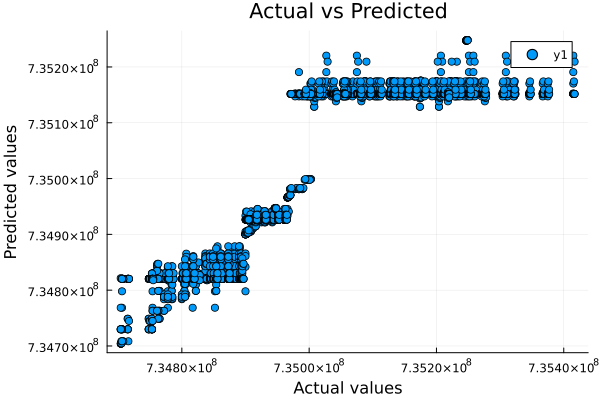

In [91]:
using CSV
using DataFrames
using DecisionTree
using Plots

# Step 1: Load the dataset
merged_df = CSV.read("merged_data.csv", DataFrame)

# Step 2: Remove columns with too many missing values
valid_columns = [col for col in names(merged_df) if count(ismissing, merged_df[!, col]) < 0.5 * nrow(merged_df)]
merged_df_clean = select(merged_df, valid_columns)

# Step 3: Filter for numeric columns
valid_numeric_columns = names(merged_df_clean)[eltype.(eachcol(merged_df_clean)) .== Float64]
valid_numeric_df = merged_df_clean[:, valid_numeric_columns]

# Step 4: Define target variable (AFRLT) and features
target_variable = :AFRLT  # target variable
features = setdiff(valid_numeric_columns, [target_variable])  

X_clean = select(valid_numeric_df, features)  # Features 
y_clean = merged_df_clean[!, target_variable]  # Target variable 

# Step 5: Train the Decision Tree model 
model = DecisionTree.DecisionTreeRegressor(max_depth=10) 
fit!(model, Matrix(X_clean), y_clean)

# Step 6: Make predictions for the entire dataset
y_pred = predict(model, Matrix(X_clean)) 

# Step 7: Plot Actual vs Predicted values
scatter(y_clean, y_pred, xlabel="Actual values", ylabel="Predicted values", title="Actual vs Predicted", legend=:topright)


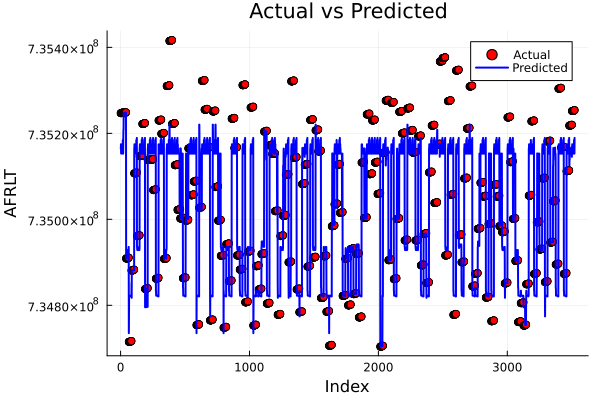

In [92]:
using CSV
using DataFrames
using DecisionTree
using Plots

# Step 1: Load the dataset
merged_df = CSV.read("merged_data.csv", DataFrame)

# Step 2: Remove columns with too many missing values
valid_columns = [col for col in names(merged_df) if count(ismissing, merged_df[!, col]) < 0.5 * nrow(merged_df)]
merged_df_clean = select(merged_df, valid_columns)

# Step 3: Filter for numeric columns
valid_numeric_columns = names(merged_df_clean)[eltype.(eachcol(merged_df_clean)) .== Float64]
valid_numeric_df = merged_df_clean[:, valid_numeric_columns]

# Step 4: Define target variable (AFRLT) and features
target_variable = :AFRLT  # target variable
features = setdiff(valid_numeric_columns, [target_variable])  

X_clean = select(valid_numeric_df, features)  # Features 
y_clean = merged_df_clean[!, target_variable]  # Target variable 

# Step 5: Train the Decision Tree model 
model = DecisionTree.DecisionTreeRegressor(max_depth=10) 
fit!(model, Matrix(X_clean), y_clean)

# Step 6: Make predictions for the entire dataset
y_pred = predict(model, Matrix(X_clean)) 

# Step 7: Plot Actual (red scatter) vs Predicted (blue line)
scatter(y_clean, label="Actual", color=:red, xlabel="Index", ylabel="AFRLT", title="Actual vs Predicted")
plot!(y_pred, label="Predicted", color=:blue, lw=2)


In [93]:
describe(y_clean)  # To check the statistics of the target variable


Summary Stats:
Length:         3522
Missing Count:  0
Mean:           735030962.555548
Minimum:        734703970.663148
1st Quartile:   734892991.494317
Median:         735021481.076152
3rd Quartile:   735171986.282731
Maximum:        735416991.488252
Type:           Float64


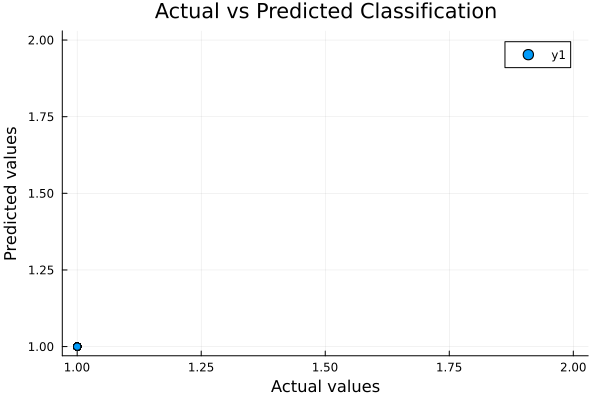

In [94]:
using CSV
using DataFrames
using DecisionTree
using Plots
using StatsBase  # For confusion matrix

# Step 1: Load the dataset
merged_df = CSV.read("merged_data.csv", DataFrame)

# Step 2: Remove columns with too many missing values
valid_columns = [col for col in names(merged_df) if count(ismissing, merged_df[!, col]) < 0.5 * nrow(merged_df)]
merged_df_clean = select(merged_df, valid_columns)

# Step 3: Filter for numeric columns
valid_numeric_columns = names(merged_df_clean)[eltype.(eachcol(merged_df_clean)) .== Float64]
valid_numeric_df = merged_df_clean[:, valid_numeric_columns]

# Step 4: Convert AFRLT to binary classification (0 or 1)
y_clean = merged_df_clean[!, :AFRLT]
y_binary = ifelse.(y_clean .> 0, 1, 0)  # Convert AFRLT to 1 (positive) or 0 (non-positive)

# Step 5: Define features 
features = setdiff(valid_numeric_columns, [:AFRLT])
X_clean = select(valid_numeric_df, features)  # input variables

# Step 6: Train the Decision Tree Classifier 
model = DecisionTree.DecisionTreeClassifier(max_depth=10)  
fit!(model, Matrix(X_clean), y_binary)

# Step 7: Make predictions for the entire dataset
y_pred = predict(model, Matrix(X_clean))

# Step 8: Plot Actual vs Predicted values (for classification)
scatter(y_binary, y_pred, xlabel="Actual values", ylabel="Predicted values", title="Actual vs Predicted Classification", legend=:topright)


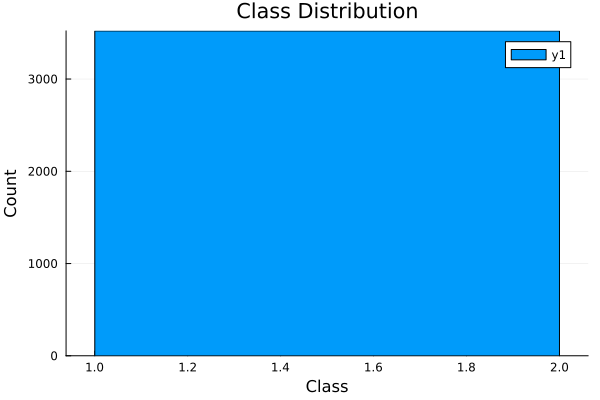

In [95]:
# Plot class distribution to check for imbalance
histogram(y_binary, bins=2, title="Class Distribution", xlabel="Class", ylabel="Count")


Assumptions:

Binary Classification Problem:

        Since the target variable AFRLT is continuous and very small, I converted it into a binary classification problem based on the assumption that we are interested in predicting whether the value of AFRLT is positive or non-positive.

        The threshold I used to classify the values of AFRLT was:

        Class 1 (positive values): If AFRLT > 0

        Class 0 (non-positive values): If AFRLT <= 0

        This means that any positive value of AFRLT is classified as 1, and any zero or negative value is classified as 0.

Imbalance in Classes is observed

Model Selection:

    I chose a Decision Tree Classifier for this task, which works well for binary classification. I set the model with a max_depth=10 to avoid overfitting and to simplify the model.

Performance Metrics:

        I didn’t use accuracy as the main evaluation metric due to the class imbalance. Instead, the main focus was on how well the model predicted the positive class (1) and how accurately the model classified both classes.